In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
from scipy import stats
from sklearn.metrics import r2_score


In [43]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

df = pd.read_csv("data/filmsdata.csv")
df[["saturation"]] = df[["saturation"]].fillna(0)
df1 = df
df2 = df
df
# df["saturation"].describe()
# years = df.groupby("year")
# print(years["imdb_rating"])

,year,title,genre,format,CSM target_age,imdb_rating,slope_(1/f),aspect_ratio,dur_(min),shots,ASL,Luminance,Motion,clutter,saturation,char/shot,ave_scale,narr_shifts,%intertitles,lum_w/_titles,mo_w/_titles,clut_w/_titles
0,1915,a fool there was,drama,live,NaN,5.9,0.27,1.33,66,326,12.1,127.0,0.97,0.06,0,NaN,NaN,NaN,0.08,122.0,0.97,0.06
1,1915,alice in wonderland 1915,adventure,live,NaN,6.4,0.12,1.33,52,188,16.5,165.0,0.97,0.07,0,NaN,NaN,NaN,0.27,139.0,0.97,0.06
2,1915,carmen,drama,live,NaN,7.0,0.63,1.33,56,303,11.1,116.0,0.90,0.07,0,NaN,NaN,NaN,0.13,101.0,0.93,0.06
3,1915,children of eve,drama,live,NaN,6.4,0.28,1.33,73,527,6.6,161.0,0.92,0.07,0,NaN,NaN,NaN,0.08,150.0,0.94,0.07
4,1915,civilization,drama,live,NaN,6.3,0.98,1.33,78,893,5.2,150.0,0.93,0.06,0,NaN,NaN,NaN,0.21,146.0,0.94,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2007,Ratatouille,kids,animation,5.0,NaN,NaN,NaN,111,1627,3.7,112.0,0.96,NaN,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2008,High School Musical 3: Senior Year,kids,live,8.0,NaN,NaN,NaN,100,1625,3.9,122.0,0.93,NaN,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,2008,Horton Hears a Who?,kids,animation,4.0,NaN,NaN,NaN,88,1504,3.2,149.0,0.93,NaN,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,2008,The Little Mermaid: Ariel's Beginning,kids,animation,5.0,NaN,NaN,NaN,70,1297,3.2,133.0,0.96,NaN,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Aspect Ratio Over Time

[1.33 1.2  1.85 2.1  1.37 2.55 1.66 1.5  2.35 1.75 2.2  1.78 2.  ]


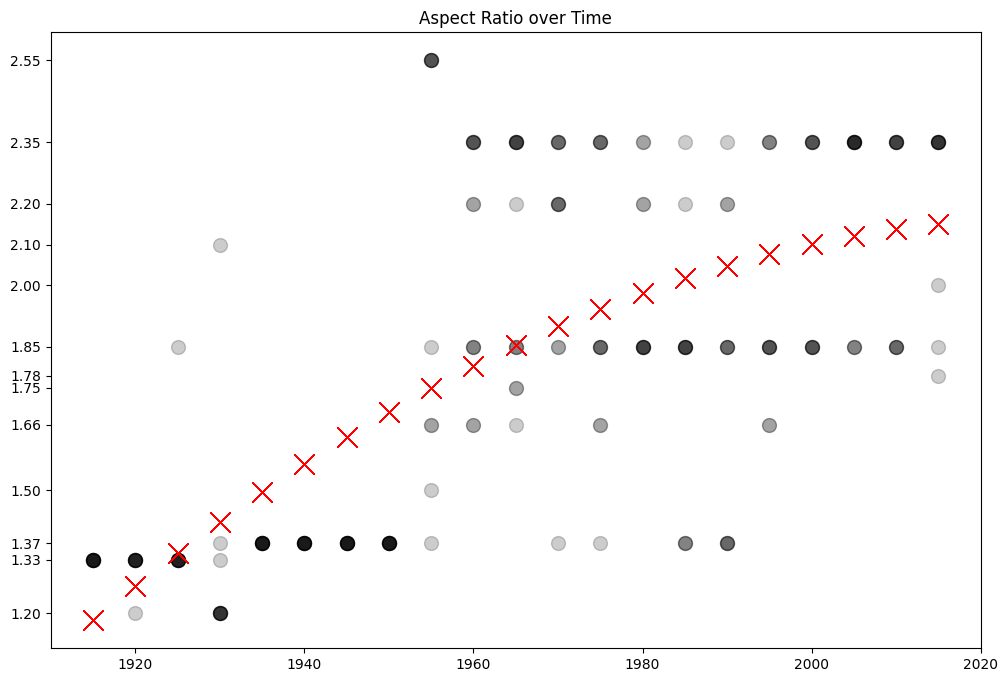

In [6]:
df1.dropna(subset = ["aspect_ratio"], inplace=True)
x = df1["year"]
# print(df["aspect_ratio"])
y = df1["aspect_ratio"]

num_degrees = 2

#Fit model
poly_model = np.polyfit(x, y, num_degrees)
poly_model = np.poly1d(poly_model)

# slope, intercept, r, p, std_err = stats.linregress(x, y)
# slope = np.float32(slope)
# model_y = [slope * i + intercept for i in x]

aspect = y.unique()
print(aspect)
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(x, y, c = "black", s = 100, alpha = 0.2)
ax.set_title("Aspect Ratio over Time")
# ax.plot(x, model_y, color='red')
model_x = x
model_y = poly_model(model_x)
ax.plot(model_x,model_y,"rx", markersize = 15)
ax.set_yticks(aspect)

#### Rotten Tomato Dataset

some data cleaning was required 

In [ ]:
tomato = pd.read_csv("data/rotten_tomatoes_top_movies.csv")
unique_asp = tomato["aspect_ratio"].unique()
print(unique_asp)
tomato = tomato[tomato["aspect_ratio"].notna()]
import re
for index, row in tomato.iterrows():
    aspect_ratio = row["aspect_ratio"]
    if aspect_ratio == "1.43:1":
        tomato.at[index, "aspect_ratio"] = float(1.43)
    elif aspect_ratio == "1.66:1":
        tomato.at[index, "aspect_ratio"] = float(1.66)
    else:
        temp_asp = re.search(r"(?<=\()(\d+\.\d{1,2})?(?=:)", aspect_ratio)
        if temp_asp is not None:
            aspect_ratio_value = float(temp_asp.group())
            tomato.at[index, "aspect_ratio"] = aspect_ratio_value
        else:
            tomato.drop(index, inplace=True)
# tomato = tomato[tomato["aspect_ratio"].notna()]

unique_asp = tomato["aspect_ratio"].unique()
print(unique_asp)

['Scope (2.35:1)' 'Flat (1.37:1)' nan 'Flat (1.85:1)'
 '35mm, Flat (1.85:1)' 'Flat (1.37:1), 35mm' '35mm'
 'Digital Projection, Flat (1.85:1)' 'Academy (1.33:1)' '1.66:1'
 'Flat (1.66:1)' 'Academy (1.33:1), 35mm' '16mm, Flat (1.85:1)'
 '35mm, Flat (1.37:1)' '35mm, Scope (2.35:1)' 'IMAX (Scope (2.35:1))'
 '70mm' 'Flat (1.37:1), 35mm, 16mm' '35mm, 1.66:1' 'Scope (2.35:1), 70mm'
 'Flat (1.37:1), 35mm, Flat (1.85:1)' '1.43:1' '70mm, Scope (2.35:1)']
[2.35 1.37 1.85 1.33 1.66 1.43]


In [ ]:
test = tomato[tomato["aspect_ratio"] == 1.43]
test

,Unnamed: 0,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,genre,original_language,director,producer,writer,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
991,991,U2 3D,2007,This concert film and its groundbreaking camer...,92,93.0,3D transports the viewer to an intimate seat a...,88,"5,000+",Musical & Performing Arts,G,documentary,English,"Catherine Owens, Mark Pellington","Jon Shapiro, Peter Shapiro, John Modell, Cathe...",NaN,"Feb 22, 2008 wide",NaN,$10.4M,1h 25m,National Geographic Society,NaN,1.43,NaN,"Bono, The Edge, Adam Clayton, Larry Mullen Jr....",http://www.rottentomatoes.com/m/u2_3d


Correlation matrix, people and critics dont agree that much it seems

In [ ]:
tomato = pd.read_csv("data/rotten_tomatoes_top_movies.csv")
corr2 = tomato.corr(numeric_only=True)
corr2.style.background_gradient(cmap='RdYlGn')

,Unnamed: 0,year,critic_score,people_score,total_reviews
Unnamed: 0,1.000000,0.113084,-0.400141,-0.278912,-0.158360
year,0.113084,1.000000,-0.202760,-0.315704,0.550345
critic_score,-0.400141,-0.202760,1.000000,0.595542,-0.050810
people_score,-0.278912,-0.315704,0.595542,1.000000,-0.085511
total_reviews,-0.158360,0.550345,-0.050810,-0.085511,1.000000


float64


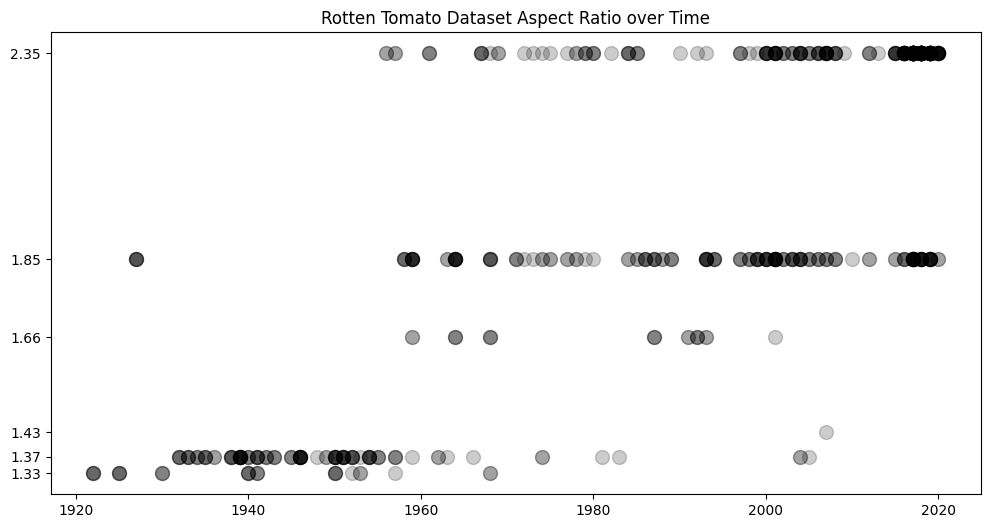

In [ ]:
tomato_x = tomato["year"]
tomato['aspect_ratio'] = pd.to_numeric(tomato['aspect_ratio'], errors='coerce')
tomato_y = tomato["aspect_ratio"]
print(tomato_y.dtype)
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(tomato_x, tomato_y, c = "black", s = 100, alpha = 0.2)
\
ax.set_title("Rotten Tomato Dataset Aspect Ratio over Time")
# ax.plot(x, model_y, color='red')
# ax.tick_params(axis='y', labelrotation=25)
# y_ticks = tomato["aspect_ratio"].unique()
y_ticks = [1.33, 1.37, 1.43, 1.66, 1.85, 2.35]

ax.set_yticks(y_ticks)

#### Average Shot Scale

0.45141944769628045


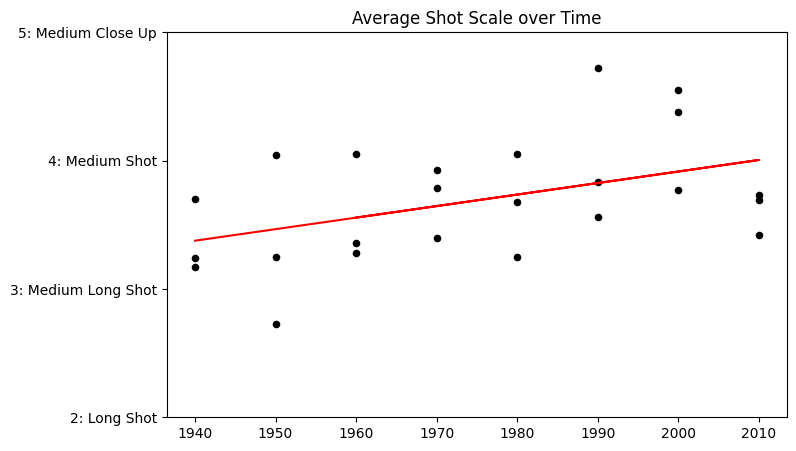

In [40]:
df.dropna(subset = ["ave_scale"], inplace=True)
x = df["year"]
# print(df["aspect_ratio"])
y = df["ave_scale"]
# print(x)
# num_degrees = 1

# #Fit model
# poly_model = np.polyfit(x, y, num_degrees)
# poly_model = np.poly1d(poly_model)

slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(x, y, c = "black", s = 20, alpha = 1)
ax.set_title("Average Shot Scale over Time")
ax.plot(x, model_y, color='red')
ax.set_ylim(2, 5)
y_ticks = range(2, 6)
ax.set_yticks(y_ticks)
scale_labels = {2: "2: Long Shot", 3: "3: Medium Long Shot", 4: "4: Medium Shot", 5: "5: Medium Close Up"}
ax.set_yticklabels([scale_labels.get(tick, '') for tick in y_ticks])
# model_x = x
# model_y = poly_model(model_x)
# ax.plot(model_x,model_y,"rx", markersize = 15)

print(r)


#### Averge Shot Length

C:\Users\stere\AppData\Local\Temp\ipykernel_27256\936770073.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax.plot(model_x,model_y,"rx", markersize = 10, color = "darkred")
C:\Users\stere\AppData\Local\Temp\ipykernel_27256\936770073.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0.5, 1, 2, 4, 8, 16, 32])


0.3446785412928376


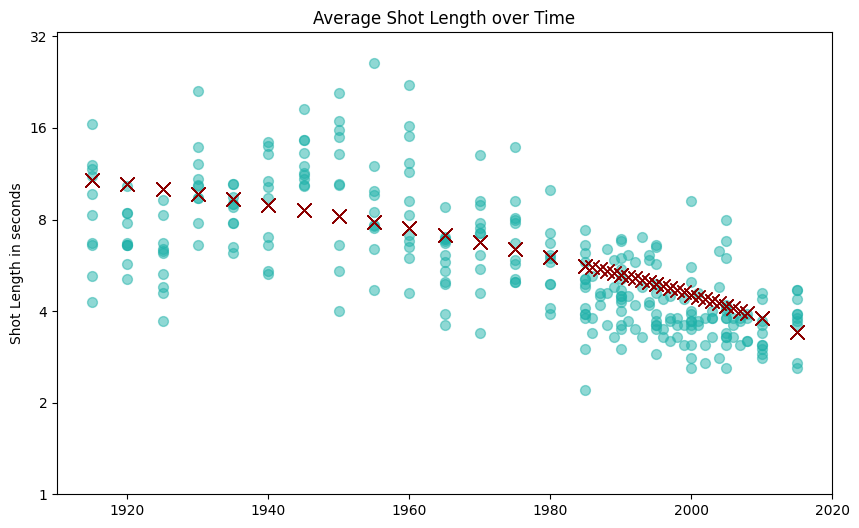

In [47]:
df2.dropna(subset = ["ASL"], inplace=True)
x = df2["year"]
# print(df["aspect_ratio"])
y = df2["ASL"]
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y, c = "lightseagreen", s = 50, alpha = 0.5 )
ax.set_title("Average Shot Length over Time")

num_degrees = 1

poly_model = np.polyfit(x, y, num_degrees)
poly_model = np.poly1d(poly_model)
model_x = x
model_y = poly_model(model_x)
ax.plot(model_x,model_y,"rx", markersize = 10, color = "darkred")
ax.set_yscale("log", base = 2)
ax.set_ylabel("Shot Length in seconds")
ax.set_ylim(1, 33)
ax.set_yticklabels([0.5, 1, 2, 4, 8, 16, 32])

print(r2_score(y, poly_model(model_x)))

#### Correlation matrix

In [ ]:

corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='RdYlGn')

,year,CSM target_age,imdb_rating,slope_(1/f),aspect_ratio,dur_(min),shots,ASL,Luminance,Motion,clutter,char/shot,ave_scale,narr_shifts,%intertitles,lum_w/_titles,mo_w/_titles,clut_w/_titles
year,1.000000,-0.033833,-0.059312,0.220266,0.678853,0.141649,0.665379,-0.587093,-0.212715,-0.302420,-0.199969,-0.713816,0.451419,0.589435,-0.092990,0.124794,-0.235091,0.060048
CSM target_age,-0.033833,1.000000,0.059561,0.009606,0.357421,0.630631,0.409139,0.166374,-0.448511,-0.560333,-0.043118,0.455166,0.175046,0.024228,nan,nan,nan,nan
imdb_rating,-0.059312,0.059561,1.000000,-0.129887,-0.001017,0.328062,-0.022692,0.188993,-0.016479,0.215769,0.086711,0.109345,-0.020760,0.223380,-0.099438,0.070094,-0.022741,0.133973
slope_(1/f),0.220266,0.009606,-0.129887,1.000000,0.156151,0.098786,0.400183,-0.327471,-0.263036,-0.464293,-0.161819,-0.095265,0.048190,0.278365,0.199466,-0.188279,0.007780,-0.152345
aspect_ratio,0.678853,0.357421,-0.001017,0.156151,1.000000,0.473712,0.572574,-0.309851,-0.241352,-0.405378,0.001279,-0.375411,0.334887,0.488679,-0.228577,0.141121,0.102909,0.144570
dur_(min),0.141649,0.630631,0.328062,0.098786,0.473712,1.000000,0.381279,0.123643,-0.247862,-0.167836,0.042099,0.131728,0.178604,0.256467,0.291386,-0.159949,0.510335,-0.103084
shots,0.665379,0.409139,-0.022692,0.400183,0.572574,0.381279,1.000000,-0.712553,-0.256800,-0.508198,-0.236010,-0.567794,0.469733,0.748618,0.190171,-0.040740,0.140284,-0.036724
ASL,-0.587093,0.166374,0.188993,-0.327471,-0.309851,0.123643,-0.712553,1.000000,0.089924,0.314277,0.299335,0.367293,-0.279055,-0.533737,0.111124,-0.152052,0.366334,-0.125948
Luminance,-0.212715,-0.448511,-0.016479,-0.263036,-0.241352,-0.247862,-0.256800,0.089924,1.000000,0.325050,0.298142,0.303246,-0.167985,-0.612443,-0.049166,0.931378,-0.287675,0.431326
Motion,-0.302420,-0.560333,0.215769,-0.464293,-0.405378,-0.167836,-0.508198,0.314277,0.325050,1.000000,0.135467,0.277389,-0.322606,-0.500469,0.292680,-0.203996,0.961173,-0.186078


#### IMDB Score Predition 

0.05798030240453078


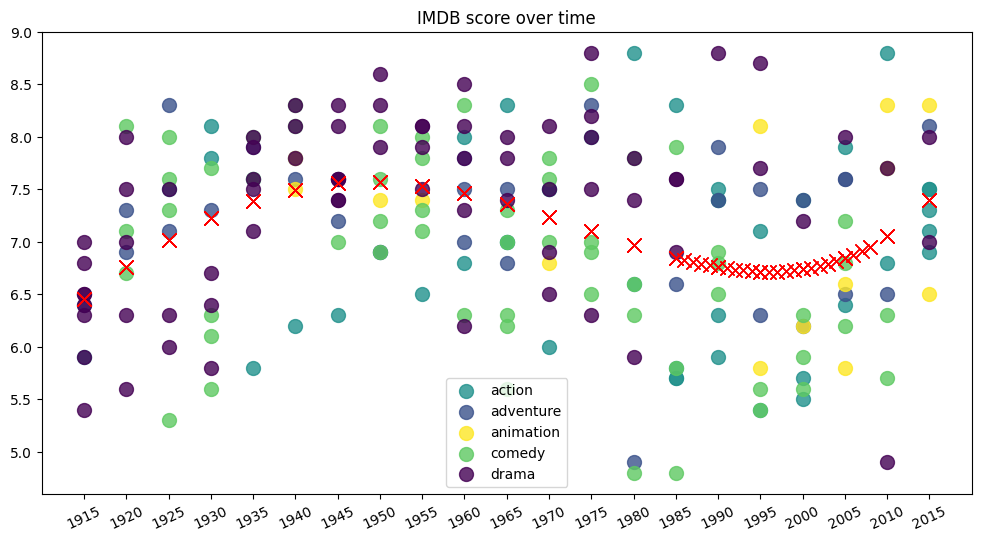

In [59]:
rating =  df[df["imdb_rating"].notna()]
# rating = df[df["genre"] == "comedy"]
# rating
fig, ax = plt.subplots(figsize = (12, 6))
year_list = pd.unique(rating["year"])
# print(year_list)
genre_list = pd.unique(rating["genre"])
colors = colormaps['viridis']
color_list = [colors(i) for i in np.linspace(0,1,len(genre_list))]
color_dict = {str(genre_list[i]):color_list[i] for i in range(len(genre_list))}

# ax.scatter(df["year"], df["imdb_rating"], s = 7)
for genre, group in rating.groupby('genre'):
    ax.scatter(group['year'], group['imdb_rating'], s=100, alpha = 0.8, label=genre, color=color_dict[genre])

ax.set_title("IMDB score over time")
ax.set_xticks(year_list)
ax.set_xticklabels(year_list,rotation=25)
ax.legend()

num_degrees = 4
poly_model = np.polyfit(rating["year"], rating["imdb_rating"], num_degrees)
poly_model = np.poly1d(poly_model)
model_x = x
model_y = poly_model(model_x)
ax.plot(model_x,model_y, "x", markersize = 10, color = "red")

print(r2_score(y, poly_model(model_x)))


Label Encoder for genres

In [77]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("data/filmsdata.csv")
df = df[df["year"].notna()]
df = df[df["imdb_rating"].notna()]

encoded_y = LabelEncoder()
df["genre_encoded"] = encoded_y.fit_transform(df["genre"])
# print(encoded_y)
# print(len(encoded_y), len(df["genre"]))
mapping = dict(zip(encoded_y.classes_, encoded_y.transform(encoded_y.classes_)))
print(mapping)
df["genre_encoded"]


{'action': 0, 'adventure': 1, 'animation': 2, 'comedy': 3, 'drama': 4}


0      4
1      1
2      4
3      4
4      4
      ..
215    4
216    4
217    4
218    1
219    1
Name: genre_encoded, Length: 220, dtype: int32

linear regression model

In [84]:
from sklearn import linear_model 
# from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr_x = df[["year", "genre_encoded"]]
regr_y = df["imdb_rating"]
regr.fit(regr_x, regr_y) 
print(regr.coef_, regr.intercept_,regr.score(regr_x, regr_y))
feature_names = regr_x.columns
# print(feature_names)
predict = regr.predict([[3000, 3]])
print(predict)

[-0.00106566  0.04738348] 9.101374522904267 0.009786664691000646
[6.04655887]


e:\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


loop through 50 years and all genres and put predictions into a table

In [90]:
all_years = range(2025, 2080, 5)
all_genres = df['genre_encoded'].unique()

predictions_df = pd.DataFrame(index=all_years, columns=all_genres)

for year in all_years:
    for genre in all_genres:

        input_features = [[year, genre]]
        prediction = regr.predict(input_features)
        
        predictions_df.at[year, genre] = prediction

swapped_map = {v: k for k, v in mapping.items()}
predictions_df.rename(columns=swapped_map, inplace=True)
predictions_df

e:\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature n

,drama,adventure,action,comedy,animation
2025,7.132956338140703,6.990805891162678,6.943422408836669,7.085572855814695,7.038189373488686
2030,7.1276280613158445,6.985477614337819,6.938094132011811,7.080244578989836,7.032861096663828
2035,7.122299784490986,6.980149337512961,6.932765855186952,7.0749163021649775,7.027532819838969
2040,7.116971507666128,6.974821060688102,6.927437578362094,7.06958802534012,7.0222045430141105
2045,7.11164323084127,6.969492783863244,6.922109301537236,7.064259748515261,7.016876266189253
2050,7.106314954016411,6.964164507038386,6.916781024712377,7.058931471690403,7.011547989364394
2055,7.100986677191553,6.958836230213528,6.91145274788752,7.053603194865545,7.0062197125395365
2060,7.095658400366695,6.9535079533886694,6.906124471062661,7.048274918040686,7.000891435714678
2065,7.090330123541836,6.948179676563811,6.900796194237802,7.042946641215828,6.995563158889819
2070,7.085001846716978,6.942851399738952,6.895467917412944,7.03761836439097,6.990234882064961
